# Crop Production Analysis

In [1]:
# Importing Required Packages

import numpy as np
import pandas as pd
import plotly.express as px           
import plotly.graph_objects as go     
import matplotlib.pyplot as plt 
import plotly as py 
from plotly import tools 
import os
import seaborn as sns

In [2]:
#importing csv file

df = pd.read_csv("C:\\Users\\Laptop-PC\\Desktop\\EDA\\crop_production.csv",encoding='unicode_escape')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
# dimension of data

df.shape

(246091, 7)

In [4]:
# Basic Information about dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


## **Checking For Null Values**

In [5]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

we have less than 5% of null values so we can drop this

In [6]:
# Droping the null values:

df.dropna(inplace=True)

In [7]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# **Exploratory Data Analysis**


### 1.which state dominates in crop production with different catagories of crops ?

In [8]:
# using loops to categorize crops

def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [9]:
#creating new categorize crop column

crops = df['Crop']
df['cat_crop']=df['Crop'].apply(cat_crop)

In [10]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [11]:
df1=pd.crosstab(df['State_Name'],df['cat_crop'])
df1

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


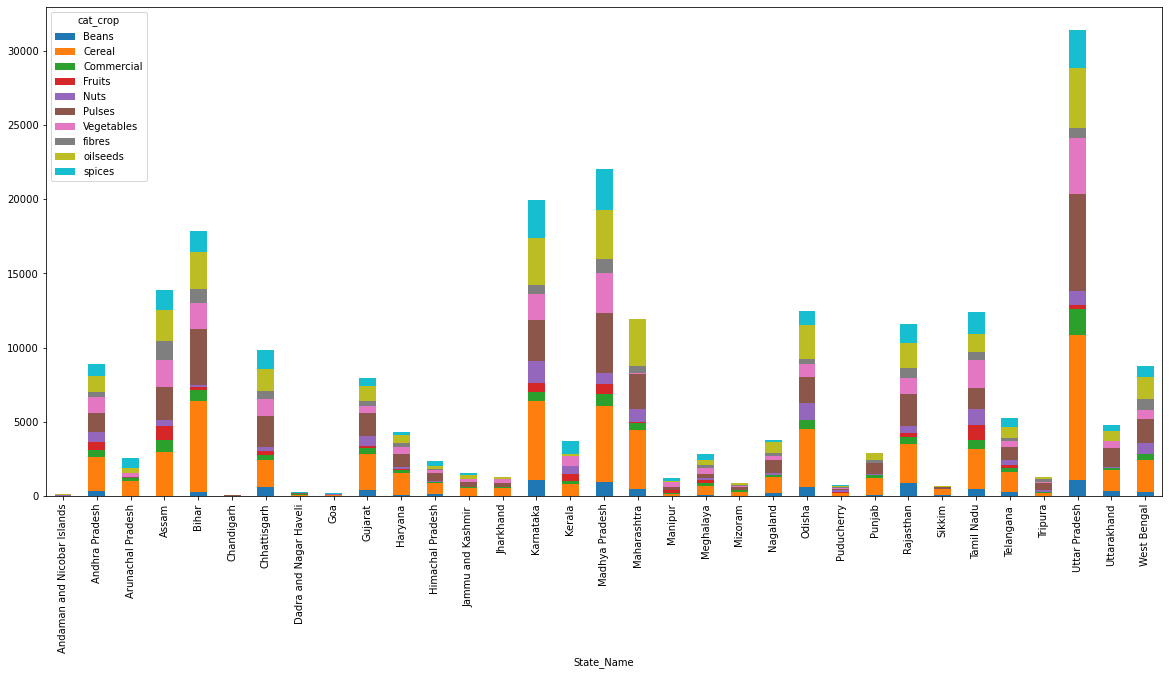

In [12]:
df1.plot(kind='bar',stacked=True,figsize = (20,9));

we can see that Uttar Pradesh dominates in crop production with different crop catagories as compared to other states

### 2.During which period of time does india see a dip in area under cultivation?

In [57]:
data= df.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.line(data, 'Crop_Year', 'Area', markers = True)

we can see that In the period of 1997-2000 occurred a massive dip in the area under cultivation

### 3.which of the following is the commercial crop in india?

In [14]:
df2=df[df['cat_crop']=='Commercial']
df2

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


In [15]:
df2['Crop'].unique()

array(['Sugarcane', 'Tobacco', 'Rubber', 'Tea', 'Coffee'], dtype=object)

As per the quiz,we can see that Tobacco is one of the crops which is available in commercial crop in india

### 4.which season does india have the least crop production?

In [16]:
df3 = df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(df3, 'Season', 'Production', color='Season',title = 'Season-Wise Least Crop Production')


we can see that Autumn and Summer both have very minor difference but least crop production occur in Autumn season

### 5.which district is lowest crop production ?

In [17]:
df4 = df.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').head()
px.bar(df4, 'District_Name', 'Production',color='District_Name',title = 'District-Wise Lowest Crop Production' )


Mumbai is the lowest crop production district

### 6.which district is highest in producing sugarcane ?

In [18]:
df_sg=df[df['Crop']=='Sugarcane']
df_sg

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Commercial
...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,Commercial


In [19]:
df5 = df_sg.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').tail(45)
px.bar(df5, 'District_Name', 'Production',color='District_Name',title = 'District-Wise Highest Sugarcane Production' )


As per the quiz,highest sugarcane production district is villupuram. 

### 8.which state is the largest producer of sugercane ?

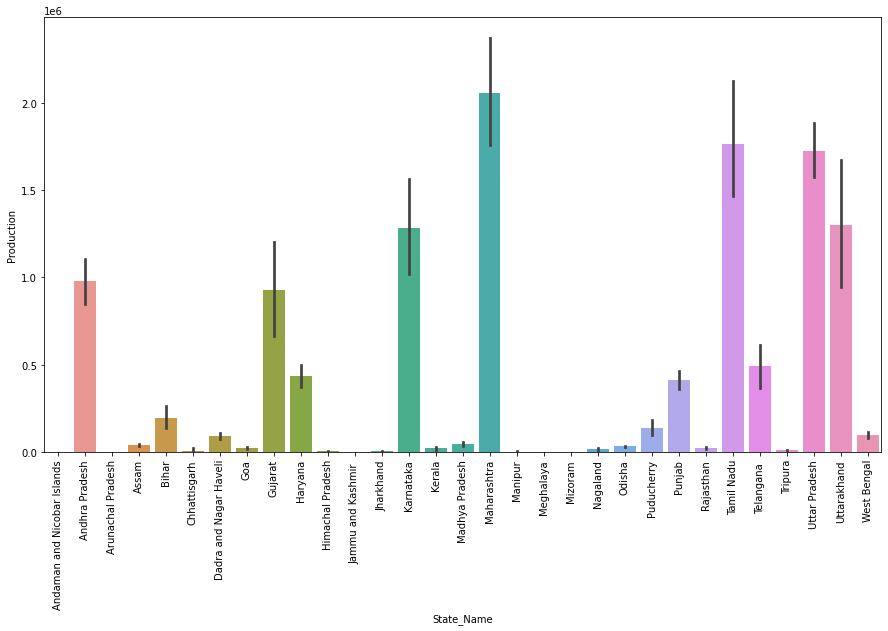

In [32]:

plt.figure(figsize=(15,8))
sns.barplot(x = "State_Name", y = "Production",data=df_sg)
plt.xticks(rotation=90)
plt.show()

Maharastra is the largest producer of sugarcane

### 9. During which year is sugarcane production being as its peak?

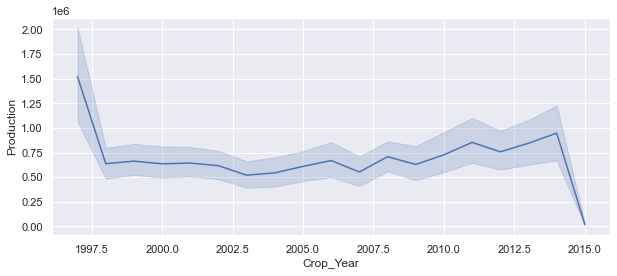

In [54]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_sg,x='Crop_Year',y='Production');

we can see that in the year of 1997, sugarcane production was at its peak

### 10.sugarcane is _________ crop ?

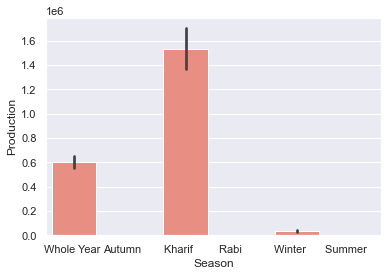

In [34]:
sns.set()
sns.barplot(x= "Season",y="Production",data=df_sg,color='salmon');

As per the quiz,Sugarcane Production Occurs in Kharif Season 

### 11.largest producer of rice ?

In [35]:
df_rc=df[df['Crop']=='Rice']
df_rc

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Cereal
...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,Cereal
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,Cereal
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,Cereal


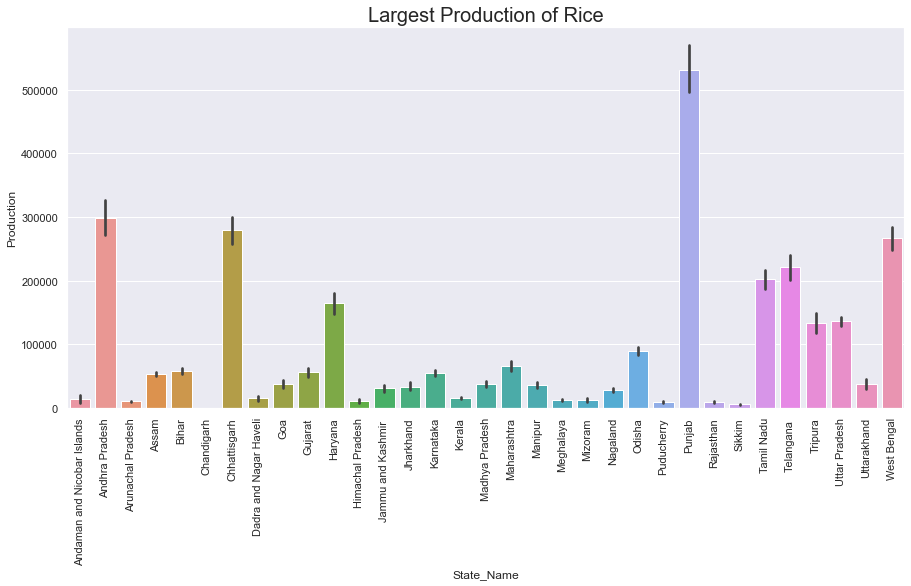

In [36]:
plt.figure(figsize=(15,7))
sns.barplot(x= "State_Name",y = "Production",data=df_rc);
plt.xticks(rotation=90)
plt.title("Largest Production of Rice",fontsize=20)
plt.show()

we can see that Largest Production of Rice Occurs in Punjab

### 12.At what period of time does india see an increase in rice production?

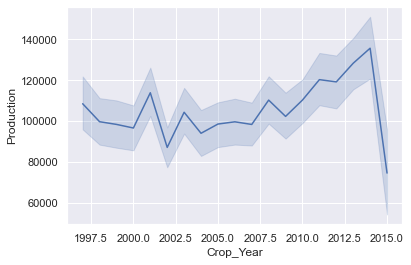

In [37]:
sns.set()
sns.lineplot(data=df_rc,x='Crop_Year',y='Production');

In the period of 2012-2014, we can clearly see that rice production increased in India.

### 13.coconut is produced in which time of the year ?

In [38]:
df_cc=df[df["Crop"]=="Coconut "]
df_cc

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,None
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,None
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,None
...,...,...,...,...,...,...,...,...
245719,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,None
245756,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,None
245792,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,None
245837,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,None


In [58]:
df_cc['Season'].unique()

array(['Whole Year ', 'Kharif     '], dtype=object)

As per the quiz, Answer is None of the above because we can see that Coconut Produced in the whole year that means throughout the year  
and the Season of Kharif that means Kharif crops are sown early-May – usually at the beginning of the first monsoon rains.

### 14.India is the largest producer of?

In [39]:
df7 = df.groupby(by='cat_crop')['Production'].count().reset_index().sort_values(by='Production')
px.bar(df7, 'cat_crop', 'Production', color='cat_crop',title = 'Largest Crop Production')


overall largest production in india is Cereal

### 15.largest coconut producing district in india ?

In [40]:
df8 = df_cc.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').tail()
px.bar(df8, 'District_Name', 'Production',color='District_Name',title = 'District-Wise Highest Coconut Production' )


Kozhikode is the Largest Coconut Producing district

### Conclusion

We started with 246091 records with 7 columns. Production Variable had 3730 (about 1.52% of total sample size)
missing values which was dropped and working dataset has 242361 sample size.we create new variable which is 
crop_category - 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibers, Beans,
Fruits. Dateset shows top categories are Cereal, Pulses and oilseeds. we performed Data visualization based on some Questions.
